In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pandas as pd
pd.options.mode.chained_assignment = None 
%matplotlib inline

In [10]:
#loading the data
data = pd.read_csv("Clean_data")

In [11]:
#subsetting the data
data = data[["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea","SalePrice"]]


In [12]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, 
    data['SalePrice'],  
    test_size=0.3,  
    random_state=0)

In [13]:
X_train.describe()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,67.880626,10567.966732,1161.722114,1522.137965,180586.228963
std,21.168450,10291.276619,373.986135,517.810449,78139.173947
min,21.000000,1300.000000,334.000000,334.000000,34900.000000
25%,60.000000,7742.500000,884.000000,1140.250000,130312.500000
50%,62.000000,9536.000000,1095.000000,1479.000000,163000.000000
75%,79.000000,11596.000000,1391.000000,1790.000000,214800.000000
max,313.000000,215245.000000,3228.000000,4676.000000,755000.000000


In [14]:
scaler = RobustScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform train and test sets
X_train_scale = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_test_scale = pd.DataFrame(scaler.transform(X_test),columns = X_train.columns)

In [15]:
X_train_scale.describe()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.309507,0.267800,0.131602,0.066392,0.208152
std,1.114129,2.670631,0.737645,0.796938,0.924861
min,-2.157895,-2.137278,-1.500986,-1.762216,-1.516201
25%,-0.105263,-0.465421,-0.416174,-0.521354,-0.386892
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.894737,0.534579,0.583826,0.478646,0.613108
max,13.210526,53.382380,4.207101,4.920354,7.006954


Text(0.5, 1.0, 'After Scaling 1stFlrSF')

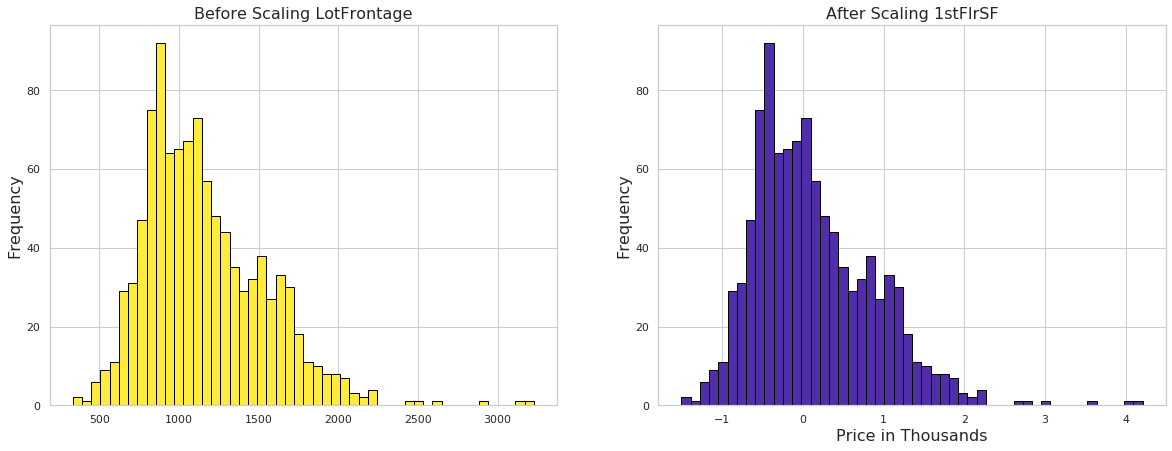

In [16]:
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

#plot using matplotlib
plt.subplot(1,2,1)   #arguments no of rows,columns, and index
plt.hist(X_train["1stFlrSF"],bins=50,ec="black",color="#FFEB3B")  #ec- edge color
plt.ylabel("Frequency",fontsize=16)
plt.title(f"Before Scaling LotFrontage",fontsize=16)


#plot using matplotlib
plt.subplot(1,2,2)   #arguments no of rows,columns, and index
plt.hist(X_train_scale["1stFlrSF"],bins=50,ec="black",color="#512DA8")  #ec- edge color
plt.xlabel("Price in Thousands",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title(f"After Scaling 1stFlrSF",fontsize=16)